In [17]:
import utils
from utils import *


Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is enabled with initial size: 75.0% of memory, cuDNN 5103)


In [18]:
import numpy as np
import pandas as pd
import bcolz 
import os 
from tqdm import tqdm
%matplotlib inline


In [2]:
path = "data/cache/"

In [3]:
x_train = []
y_train = []

df_train = pd.read_csv('data/train_v2.csv')
df_test = pd.read_csv('data/sample_submission_v2.csv')

flatten = lambda l: [item for sublist in l for item in sublist]
labels = list(set(flatten([l.split(' ') for l in df_train['tags'].values])))

labels = ['blow_down',
 'bare_ground',
 'conventional_mine',
 'blooming',
 'cultivation',
 'artisinal_mine',
 'haze',
 'primary',
 'slash_burn',
 'habitation',
 'clear',
 'road',
 'selective_logging',
 'partly_cloudy',
 'agriculture',
 'water',
 'cloudy']

label_map = {'agriculture': 14,
 'artisinal_mine': 5,
 'bare_ground': 1,
 'blooming': 3,
 'blow_down': 0,
 'clear': 10,
 'cloudy': 16,
 'conventional_mine': 2,
 'cultivation': 4,
 'habitation': 9,
 'haze': 6,
 'partly_cloudy': 13,
 'primary': 7,
 'road': 11,
 'selective_logging': 12,
 'slash_burn': 8,
 'water': 15}

In [4]:


def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()


def load_array(fname):
    return bcolz.open(fname)[:]


In [93]:
label_preds = [""]*df_test.shape[0]
# class_pred_dict = {}

for class_name in labels:
    
    
    
    
    if not os.path.exists(os.path.join(path,class_name)):
        print "class not available: ", class_name
        continue 

        
    print "processing predictions for class", class_name
    
    ### test preds
    test_preds = load_array(os.path.join(path,class_name,"test_preds_5cv_vgg1.dat"))
    
    kfold_mean_preds  = np.array(test_preds[0])
    for i in range(1, 5):
        kfold_mean_preds += np.array(test_preds[i])
    kfold_mean_preds /= 5
    
    
    ### thresholds 
    thresholds = load_array(os.path.join(path,class_name,"thresholds_vgg1.dat"))
    thresholds_mean  = thresholds[:,1].mean()
    
    label_filter = kfold_mean_preds > thresholds_mean
    
    
    for i in range(len(label_preds)):
        if label_filter[i]:
            label_preds[i] =  label_preds[i] + " " + class_name
    
            




processing predictions for class blow_down
processing predictions for class bare_ground
processing predictions for class conventional_mine
processing predictions for class blooming
processing predictions for class cultivation
processing predictions for class artisinal_mine
class not available:  haze
processing predictions for class primary
processing predictions for class slash_burn
processing predictions for class habitation
class not available:  clear
processing predictions for class road
processing predictions for class selective_logging
class not available:  partly_cloudy
processing predictions for class agriculture
processing predictions for class water
class not available:  cloudy


#### processing weather labels 

In [94]:
### test preds
test_preds = load_array(os.path.join(path,"weather","test_preds_5cv_vgg1.dat"))

kfold_mean_preds  = np.array(test_preds[0])
for i in range(1, 5):
    kfold_mean_preds += np.array(test_preds[i])
kfold_mean_preds /= 5


In [95]:
weather_labels =  ['clear','cloudy','partly_cloudy','haze']

In [96]:

weather_preds = [""]*len(kfold_mean_preds)

for i in range(len(kfold_mean_preds)): 
    weather_preds[i] = weather_labels[np.argmax(kfold_mean_preds[i])]

In [83]:
# ### filtering 
# weather_preds = []
# result = pd.DataFrame(kfold_mean_preds, columns = ['clear','cloudy','partly_cloudy','haze'])

# for i in tqdm(range(result.shape[0]), miniters=1000):
#     a = result.ix[[i]]
#     a = a.apply(lambda x: x > thresholds_mean, axis=1)
#     a = a.transpose()
#     a = a.loc[a[i] == True]
#     ' '.join(list(a.index))
#     weather_preds.append(' '.join(list(a.index)))



In [89]:
count = 0 
for i in range(len(weather_preds)):
    if weather_preds[i] == "haze":
        print i
        count += 1 

9
45
46
106
144
160
164
178
183
201
232
264
277
305
331
348
358
374
379
389
406
421
449
452
467
512
519
524
549
578
601
609
631
675
692
755
769
804
825
883
886
889
897
917
919
958
990
998
1029
1032
1056
1098
1142
1156
1162
1183
1238
1245
1270
1306
1327
1363
1365
1367
1380
1386
1396
1416
1425
1445
1470
1480
1514
1558
1559
1561
1568
1623
1625
1633
1652
1664
1673
1727
1736
1761
1835
1841
1843
1861
1872
1875
1882
1921
1923
1975
2020
2041
2043
2047
2051
2059
2087
2128
2148
2149
2232
2237
2264
2297
2300
2315
2324
2332
2372
2376
2378
2401
2409
2415
2423
2488
2502
2518
2520
2558
2572
2586
2597
2632
2638
2653
2676
2682
2683
2702
2708
2715
2727
2730
2760
2778
2784
2804
2820
2878
2885
2894
2930
2957
2960
2969
2980
2984
3000
3013
3037
3042
3096
3099
3103
3108
3116
3164
3221
3232
3247
3266
3312
3320
3323
3338
3340
3361
3391
3425
3454
3456
3460
3462
3466
3544
3551
3558
3574
3593
3598
3625
3685
3702
3707
3771
3775
3776
3804
3814
3825
3829
3864
3869
3888
3911
3979
3995
3998
4020
4025
4032
4064
4070
41

34247
34301
34331
34335
34339
34350
34355
34362
34371
34376
34384
34423
34426
34449
34485
34493
34505
34574
34579
34587
34588
34637
34641
34670
34697
34713
34718
34725
34732
34744
34758
34797
34805
34806
34813
34834
34851
34876
34955
35006
35007
35010
35022
35046
35051
35052
35098
35156
35190
35197
35200
35204
35222
35243
35245
35272
35281
35290
35309
35329
35354
35411
35427
35437
35482
35483
35540
35564
35570
35571
35575
35580
35595
35661
35664
35706
35710
35716
35724
35729
35757
35768
35795
35807
35847
35858
35863
35868
35869
35922
35962
35965
35968
35983
35998
35999
36028
36038
36052
36062
36063
36077
36105
36125
36133
36135
36172
36203
36220
36221
36226
36234
36242
36250
36283
36339
36349
36451
36453
36474
36475
36492
36530
36538
36563
36564
36566
36578
36579
36583
36590
36592
36644
36653
36674
36691
36695
36708
36721
36723
36734
36749
36762
36786
36807
36812
36867
36909
36932
36938
36948
36960
36969
36994
36995
37015
37021
37041
37042
37054
37068
37083
37087
37096
37098
37124
3712

In [90]:
count

3417

In [11]:
from PIL import Image as pil_image

In [26]:
test_file_names = os.listdir("data/test-jpg/")

In [54]:
del i

In [62]:
# img_id = 3
# img = pil_image.open('data/test-jpg/{}.jpg'.format(df_test.image_name[img_id])).convert('RGB')
# plt.title(label_preds[img_id]+" "+weather_preds[img_id])
# plt.imshow(img)

In [97]:
final_tags = label_preds


for i in range(len(label_preds)):
    final_tags[i] = final_tags[i] +" "+ weather_preds[i]


In [87]:
# count = 0 
# for i in range(len(weather_preds)):
#     if len(weather_preds[i].split()) > 1:
#         count += 1 
#         print i, weather_preds[i]
        
        


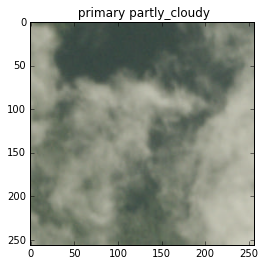

In [107]:
img_id = 4 
img = pil_image.open('data/test-jpg/{}.jpg'.format(df_test.image_name[img_id])).convert('RGB')
plt.title(final_tags[img_id])
plt.imshow(img)

In [104]:
df_test = pd.read_csv('data/sample_submission_v2.csv')


In [105]:
df_test["tags"] = label_preds
df_test.head()

,image_name,tags
0,test_0,primary clear
1,test_1,primary clear
2,test_2,primary partly_cloudy
3,test_3,primary agriculture clear
4,test_4,primary partly_cloudy


In [108]:
submission_file = 'subm/vgg1_full_jpg_onemodelperclass.csv'
df_test.to_csv(submission_file, index=False)
FileLink(submission_file)

/home/ubuntu/planet/subm/vgg1_full_jpg_onemodelperclass.csv